# Generate plots for figure 6

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle
import sklearn
from helpers import average_by_timestep, measure_tangling
from sklearn.decomposition import PCA
from matplotlib.cm import get_cmap
from definitions import ROOT_DIR

MyoSuite:> Registering Myo Envs


## Load the Baoding-SV and Baoding-LV dataset

In [2]:
baoding_sv_df = pd.read_hdf(os.path.join(ROOT_DIR, "data", "datasets", "rollouts", "baoding_sv.h5"))
baoding_lv_df = pd.read_hdf(os.path.join(ROOT_DIR, "data", "datasets", "rollouts", "baoding_lv.h5"))

## Compute the PCA of each layer to project to a common subspace

In [3]:
n_comp = 25
layer_names = ["observation", "lstm_state_1", "lstm_out", "layer_1_out", "layer_2_out", "action"]
readable_layer_names = ["Observation", "LSTM state", "LSTM out", "Layer 1 out", "Layer 2 out", "Action"]

pca = PCA(n_components=n_comp)

for layer in layer_names:
    print("Layer: ", layer)
    data = np.array(baoding_sv_df[layer].to_list())
    embeddings = pca.fit_transform(data)
    baoding_sv_df[layer + "_pc"] = list(embeddings)

Layer:  observation
Layer:  lstm_state_1
Layer:  lstm_out
Layer:  layer_1_out
Layer:  layer_2_out
Layer:  action


## Plot the average trajectory of the first 3 components of the pca of each layer (not part of the figure)

/tmp/ipykernel_32319/1944667997.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_32319/1944667997.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_32319/1944667997.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_32319/1944667997.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_32319/1944667997.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_32319/1944667997.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


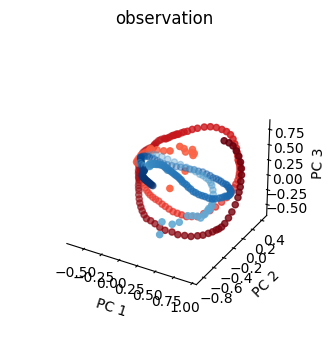

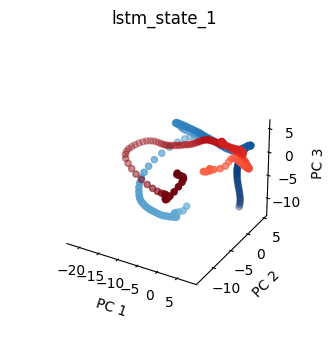

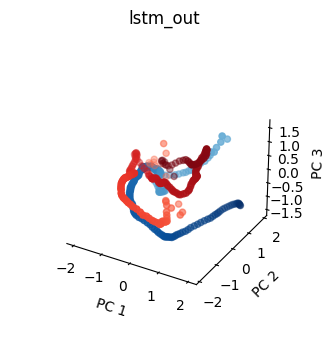

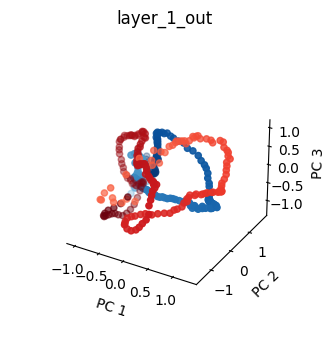

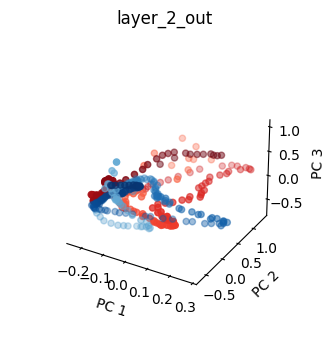

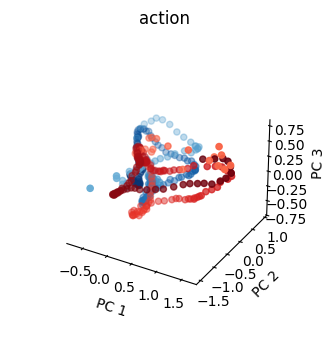

In [4]:
first_step = 13
df_trunc = baoding_sv_df[baoding_sv_df.step > first_step]
for layer in layer_names:
    data = np.array(df_trunc[layer + "_pc"].to_list())
    umap_cw = data[df_trunc.task == "cw"]
    umap_ccw = data[df_trunc.task == "ccw"]
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(projection="3d")

    cmap = matplotlib.colormaps["Reds"]
    color_list = [cmap(i) for i in np.linspace(0.5, 1, len(df_trunc.step[df_trunc.task == "cw"].unique()))]    
    colors = [color_list[idx] for idx in (df_trunc.step[df_trunc.task == "cw"] - first_step - 1)]
    mean_traj = average_by_timestep(umap_cw[:, :3], df_trunc.step[df_trunc.task == "cw"])
    ax.scatter(mean_traj[:, 0], mean_traj[:, 1], mean_traj[:, 2], c=color_list, label="Clockwise")

    cmap = matplotlib.colormaps["Blues"]
    color_list = [cmap(i) for i in np.linspace(0.5, 1, len(df_trunc.step[df_trunc.task == "ccw"].unique()))]    
    colors = [color_list[idx] for idx in (df_trunc.step[df_trunc.task == "ccw"] - first_step - 1)]
    mean_traj = average_by_timestep(umap_ccw[:, :3], df_trunc.step[df_trunc.task == "ccw"])
    ax.scatter(mean_traj[:, 0], mean_traj[:, 1], mean_traj[:, 2], c=color_list, label="Counter-clockwise")
    ax.set_title(layer)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.set_xlabel("\nPC 1")
    ax.set_ylabel("\nPC 2")
    ax.set_zlabel("\nPC 3")
    ax.set_box_aspect(aspect=None, zoom=0.75)
    fig.show()

## Plot the 3d projection with UMAP

In [5]:
# create directory if it doesn't already exist
out_path = os.path.join(ROOT_DIR, "data", "figures", "fig_6")
os.makedirs(out_path, exist_ok=True)

Layer observation


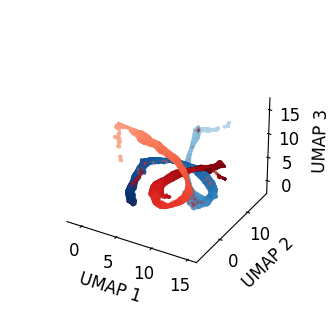

Layer lstm_state_1


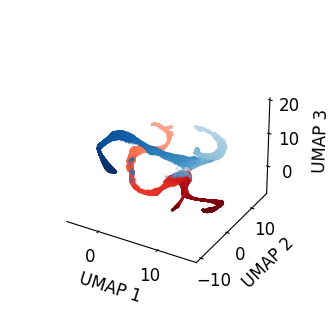

Layer lstm_out


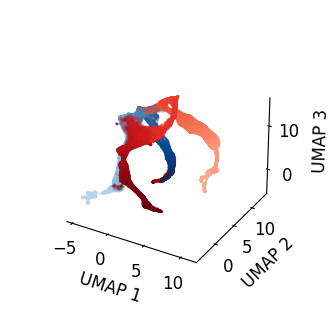

Layer layer_1_out


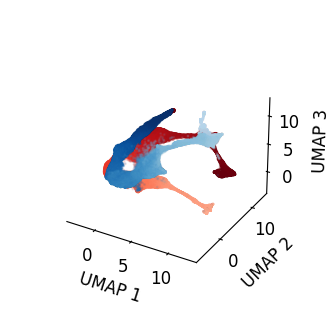

Layer layer_2_out


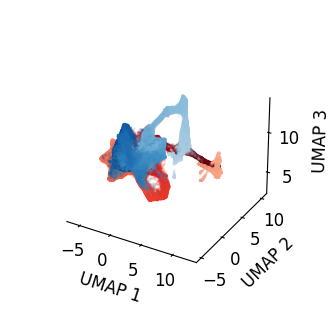

Layer action


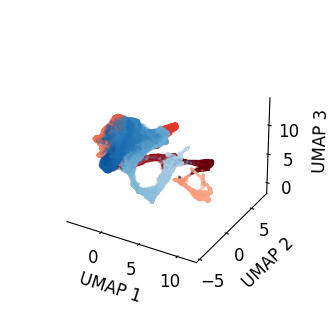

In [9]:
# Graph per layer with UMAP
first_step = 13
df_trunc = baoding_sv_df[baoding_sv_df.step > first_step]
for layer in layer_names:
    print("Layer", layer)
    out_dir = os.path.join(ROOT_DIR, "data", "datasets", "umap")
    
    with open(os.path.join(out_dir, f"umap_embeddings_ccw_{layer}.pkl"), "rb") as file:
        umap_ccw = pickle.load(file)
    with open(os.path.join(out_dir, f"umap_embeddings_cw_{layer}.pkl"), "rb") as file:
        umap_cw = pickle.load(file)
        
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(projection="3d")
    
    cmap = matplotlib.colormaps["Reds"]
    color_list = [cmap(i) for i in np.linspace(0.3, 1, len(df_trunc.step[df_trunc.task == "cw"].unique()))]    
    colors = [color_list[idx] for idx in (df_trunc.step[df_trunc.task == "cw"] - first_step - 1)]
    ax.scatter(umap_cw[:, 0], umap_cw[:, 1], umap_cw[:, 2], alpha=0.1, s=1, c=colors)
    mean_traj = average_by_timestep(umap_cw[:, :3], df_trunc.step[df_trunc.task == "cw"])
    
    cmap = matplotlib.colormaps["Blues"]
    color_list = [cmap(i) for i in np.linspace(0.3, 1, len(df_trunc.step[df_trunc.task == "ccw"].unique()))]    
    colors = [color_list[idx] for idx in (df_trunc.step[df_trunc.task == "ccw"] - first_step - 1)]
    ax.scatter(umap_ccw[:, 0], umap_ccw[:, 1], umap_ccw[:, 2], alpha=0.1, s=1, c=colors)
    mean_traj = average_by_timestep(umap_ccw[:, :3], df_trunc.step[df_trunc.task == "ccw"])

    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

    ax.set_xlabel("\nUMAP 1", fontsize=12)
    ax.set_ylabel("\nUMAP 2", fontsize=12)
    ax.set_zlabel("\nUMAP 3", fontsize=12)
    ax.set_box_aspect(aspect=None, zoom=0.75)
    ax.ticklabel_format(style="sci", scilimits=(-2, 2))
    ax.locator_params(axis='both', nbins=4)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

    plt.savefig(os.path.join(out_path, f"umap_{layer}.png"), format="png", dpi=600, bbox_inches="tight")
    plt.show()

## Compute the tangling after projecting to an 8-dimensional space and generate the scatter plots

In [10]:
num_components = 8

for layer in layer_names:
    tangling_list = []
    episode_pc_list = baoding_sv_df.groupby(["episode", "task"])[layer + "_pc"].agg(lambda x: np.vstack(x)[:, :num_components]).tolist()
    for episode_pc in episode_pc_list:
        tangling_list.append(measure_tangling(episode_pc))
    print(layer, np.mean(tangling_list))

observation 5290.439359285902
lstm_state_1 2583.9607
lstm_out 3962.0525
layer_1_out 9193.235
layer_2_out 68539.91
action 7813.6177


/tmp/ipykernel_32319/146854818.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_32319/146854818.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


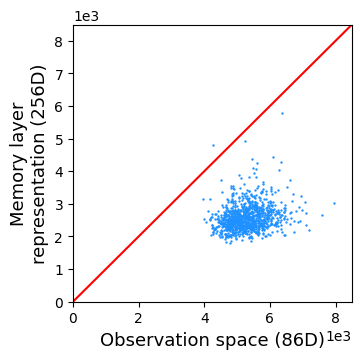

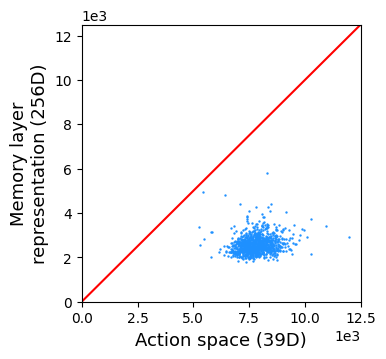

In [11]:
# Scatter plot tangling memory vs observation and memory vs action
scatter_layer_names = ["observation", "lstm_state_1", "action"]
tangling_dict = {}
for layer in scatter_layer_names:
    tangling_list = []
    episode_pc_list = baoding_sv_df.groupby(["episode", "task"])[layer + "_pc"].agg(lambda x: np.vstack(x)[:, :num_components]).tolist()
    for episode_pc in episode_pc_list:
        tangling_list.append(measure_tangling(episode_pc))
    tangling_dict[layer] = tangling_list

# memory vs observation
lim = (0, 8500)
fig, ax = plt.subplots(figsize=(3.6, 3.6))
ax.scatter(tangling_dict["observation"], tangling_dict["lstm_state_1"], s=0.5, color="dodgerblue")
ax.plot(lim, lim, color="red")
ax.set_xlabel("Observation space (86D)", fontsize=13)
ax.set_ylabel("Memory layer\nrepresentation (256D)", fontsize=13)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.ticklabel_format(scilimits=(3, 3))
out_name = "scatter_tangling_memory_vs_observation.png"
fig.savefig(os.path.join(out_path, out_name), format="png", dpi=800, bbox_inches="tight")
fig.show()

# memory vs action
lim = (0, 12500)
fig, ax = plt.subplots(figsize=(3.6, 3.6))
ax.scatter(tangling_dict["action"], tangling_dict["lstm_state_1"], s=0.5, color="dodgerblue")
ax.plot(lim, lim, color="red")
ax.set_xlabel("Action space (39D)", fontsize=13)
ax.set_ylabel("Memory layer\nrepresentation (256D)", fontsize=13)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.ticklabel_format(scilimits=(3, 3))
out_name = "scatter_tangling_memory_vs_action.png"
fig.savefig(os.path.join(out_path, out_name), format="png", dpi=800, bbox_inches="tight")
fig.show()
        

## Compute the linear readout of different variables from each layer of the network

In [12]:
# First regress the continuous variables with linear regression (takes some minutes to run)
results_list = []
regression = sklearn.linear_model.LinearRegression()
for target in ["mass_1", "mass_2", "size_1", "size_2", "friction_0", "friction_1", "friction_2", "x_radius", "y_radius"]:
    for key in ["observation", "lstm_state_0", "lstm_state_1", "lstm_out", "layer_1_out", "layer_2_out", "action"]:
        X = np.array(baoding_lv_df[key].to_list())
        y = baoding_lv_df[target].to_numpy()
        cv = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        cv_score = sklearn.model_selection.cross_val_score(regression, X, y, cv=cv)
        print("Key:", key, " target:", target,  "score:", cv_score)
        results_list.append({"input": key, "target": target, "score": cv_score})


Key: observation  target: mass_1 score: [0.28662241 0.2857485  0.28446353 0.28604147 0.29547192]
Key: lstm_state_0  target: mass_1 score: [0.22932988 0.2259221  0.22711726 0.22701566 0.23468391]
Key: lstm_state_1  target: mass_1 score: [0.30157498 0.30271525 0.29841952 0.30353431 0.30418472]
Key: lstm_out  target: mass_1 score: [0.22932988 0.2259221  0.22711726 0.22701566 0.23468391]
Key: layer_1_out  target: mass_1 score: [0.12398156 0.11894569 0.11703466 0.12176024 0.12281016]
Key: layer_2_out  target: mass_1 score: [0.07467371 0.07544147 0.07078735 0.07274283 0.07577327]
Key: action  target: mass_1 score: [0.03053426 0.02897851 0.02739788 0.02854818 0.0285945 ]
Key: observation  target: mass_2 score: [0.29369934 0.28027861 0.29300282 0.2836543  0.28709441]
Key: lstm_state_0  target: mass_2 score: [0.23890163 0.23172863 0.23890003 0.23880682 0.23381622]
Key: lstm_state_1  target: mass_2 score: [0.30953191 0.29772223 0.30408387 0.30214268 0.29862142]
Key: lstm_out  target: mass_2 scor

In [14]:
# Then regress the categorical variable with logistic regression
classification = sklearn.linear_model.LogisticRegression(max_iter=10_000)
target = "task"
for key in ["observation", "lstm_state_0", "lstm_state_1", "lstm_out", "layer_1_out", "layer_2_out", "action"]:
    X = np.array(baoding_lv_df[key].to_list())
    y = baoding_lv_df[target].to_numpy()
    cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = sklearn.model_selection.cross_val_score(classification, X, y, cv=cv)
    print("Key:", key, " target:", target,  "score:", cv_score)
    results_list.append({"input": key, "target": target, "score": cv_score})

Key: observation  target: task score: [0.87560646 0.87743253 0.87714089 0.8778037  0.87512593]
Key: lstm_state_0  target: task score: [0.93273947 0.92905244 0.92783286 0.93021899 0.93005992]
Key: lstm_state_1  target: task score: [0.9471354  0.94625908 0.94519858 0.9454637  0.94541068]
Key: lstm_out  target: task score: [0.93273947 0.92905244 0.92783286 0.93021899 0.93005992]
Key: layer_1_out  target: task score: [0.88252605 0.88011029 0.88140941 0.88026937 0.87965958]
Key: layer_2_out  target: task score: [0.82526048 0.82628984 0.82345299 0.82814571 0.82533538]
Key: action  target: task score: [0.68716032 0.69009491 0.68762925 0.68606501 0.69065168]


In [15]:
# Finally regress the continuous varibales with multiple values with linear regression
regression = sklearn.linear_model.LinearRegression()
for target in ["hand_pos", "hand_vel"]:
    for key in ["observation", "lstm_state_0", "lstm_state_1", "lstm_out", "layer_1_out", "layer_2_out", "action"]:
        X = np.array(baoding_lv_df[key].to_list())
        y = np.array(baoding_lv_df[target].to_list())

        cv = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        cv_score = sklearn.model_selection.cross_val_score(regression, X, y, cv=cv)

        print("Key:", key, " target:", target,  "score:", cv_score)
        results_list.append({"input": key, "target": target, "score": cv_score})

Key: observation  target: hand_pos score: [1. 1. 1. 1. 1.]
Key: lstm_state_0  target: hand_pos score: [0.82719112 0.82664249 0.82645168 0.82645548 0.82660241]
Key: lstm_state_1  target: hand_pos score: [0.86719261 0.86710849 0.866549   0.86669076 0.86673811]
Key: lstm_out  target: hand_pos score: [0.82719112 0.82664249 0.82645168 0.82645548 0.82660241]
Key: layer_1_out  target: hand_pos score: [0.68308028 0.68370236 0.68165376 0.68292013 0.68209706]
Key: layer_2_out  target: hand_pos score: [0.59276778 0.59531149 0.59291845 0.59617153 0.59581509]
Key: action  target: hand_pos score: [0.38105658 0.38246834 0.38089403 0.38384173 0.38314847]
Key: observation  target: hand_vel score: [0.67432544 0.67295714 0.67239206 0.67594439 0.6746392 ]
Key: lstm_state_0  target: hand_vel score: [0.62197255 0.61991916 0.62054514 0.62543252 0.62209407]
Key: lstm_state_1  target: hand_vel score: [0.63612465 0.63527033 0.63576062 0.6402383  0.63779015]
Key: lstm_out  target: hand_vel score: [0.62197255 0.6

In [16]:
save_results = False
results_list_mean_sem = [{
    "input": el["input"],
    "target": el["target"],
    "score_mean": np.mean(el["score"]),
    "score_std": np.std(el["score"])
    }
    for el in results_list
]
results_df = pd.DataFrame(results_list_mean_sem)
if save_results:
    results_df.to_hdf(os.path.join(ROOT_DIR, "data", "linear_encoding", "encoding_all_variables.h5"), key="data")

/tmp/ipykernel_32319/1471965038.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("coolwarm")


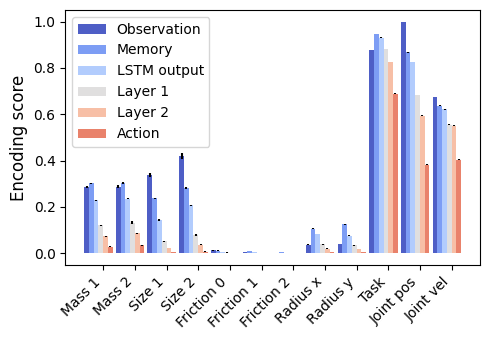

In [20]:
layers_list = ["observation", "lstm_state_1", "lstm_out", "layer_1_out", "layer_2_out", "action"]
layers_name_list = ["Observation", "Memory", "LSTM output", "Layer 1", "Layer 2", "Action"]
targets_list = ["mass_1", "mass_2", "size_1", "size_2", "friction_0", "friction_1", "friction_2", "x_radius", "y_radius", "task", "hand_pos", "hand_vel"]
targets_name_list = ["Mass 1", "Mass 2", "Size 1", "Size 2", "Friction 0", "Friction 1", "Friction 2", "Radius x", "Radius y", "Task", "Joint pos", "Joint vel"]

# Create a pivot table to reshape the data
pivot_data = results_df.pivot_table(index="target", columns="input", values="score_mean").loc[targets_list]
pivot_std = results_df.pivot_table(index="target", columns="input", values="score_std").loc[targets_list]

# Set the width of each bar
bar_width = 0.15

# Create an array of x values for the bars
x = np.arange(len(targets_list))

# Create a grouped barplot
fig, ax = plt.subplots(figsize=(5, 3.5))
cmap = get_cmap("coolwarm")


for i, layer in enumerate(layers_list):
    ax.bar(x + i * bar_width, pivot_data[layer], bar_width, yerr=pivot_std[layer], label=layers_name_list[i], color=cmap((i) / (len(layers_list))), alpha=0.9)

# Set x-axis labels and tick positions
ax.set_xticks(x + (len(pivot_data.columns) / 2) * bar_width)
ax.set_xticklabels(targets_name_list, rotation=45, ha='right')

# Set labels and title
# ax.set_xlabel('Encoded quantity')
ax.set_ylabel('Encoding score', fontsize=12)
# ax.set_title('Encoding Value by Layer for Each Quantity')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(out_path, "layer_encoding.png"), format="png", dpi=600, bbox_inches="tight")

plt.show()